# Simple ray tracing

In [1]:
# setup path to ray_tracing package
import sys
sys.path.append('~/Documents/python/ray_tracing/')

import ray_tracing as rt
from matplotlib import rcParams
rcParams['figure.figsize'] = [8, 4]

import matplotlib.pyplot as plt
plt.ion()

## Principle

The package 'ray_tracing.py' provides you with the means to quickly plot an optical system. Currently included are Lenses (L) with and without an aperture and simple apertures (A), such as irises, that are separated by distances (D). All ray tracing is done according to the paraxial approximation: $\sin \alpha \approx \tan \alpha \approx \alpha$, the larger $\alpha$ the larger the error!

### Example 1: one lens

Lets look at one lens of focal length 100 mm, an object shall be placed 150 mm apart from it and we look at two rays, __[the marginal and the principle ray](https://en.wikipedia.org/wiki/Ray_(optics))__. A ray is given as a vector $(h, \varphi)$, where $h$ is the height of the starting point and $\varphi$ is the angle measured against the optical axis in rad.

<IPython.core.display.Javascript object>


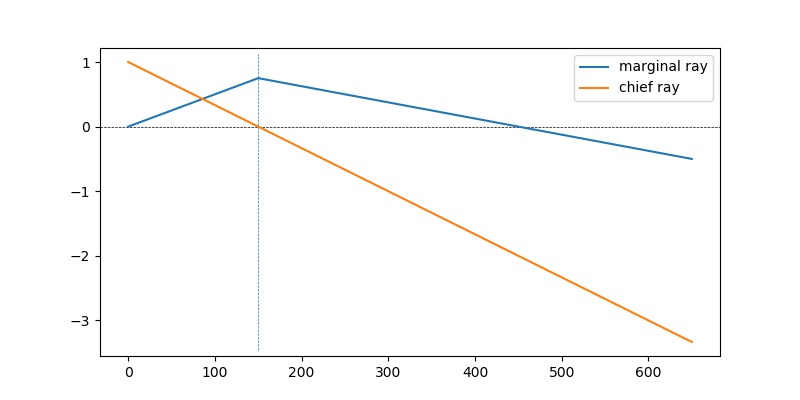

In [13]:
osys = rt.OpticalSystem(' d150 | L100 | d500 ')
height_1 = 0.0; phi_1 = 0.005;
ray_1 = (height_1, phi_1)

height_2 = 1.0; phi_2 = -1/150;
ray_2 = (height_2, phi_2)

ax = osys.plot_statics()
osys.plot_ray(ray_1, label="marginal ray")
osys.plot_ray(ray_2, label="chief ray")
ax.legend()

You can see that the marginal ray (blue) crosses the optical axis again at 450 mm. This is where the image is formed. The height of the chief (orange) ray at that position is 2.0 mm. Lets check that:

In [3]:
rt.get_image_pos(object_distance=150, focal_length=100)

300.0

In [4]:
rt.get_image_size(object_size=1.0, object_distance=150, focal_length=100)

2.0

The image is formed 300 mm after the lens, hence at 450 mm and it's magnified twice.

### Example 2: two lens system

<IPython.core.display.Javascript object>


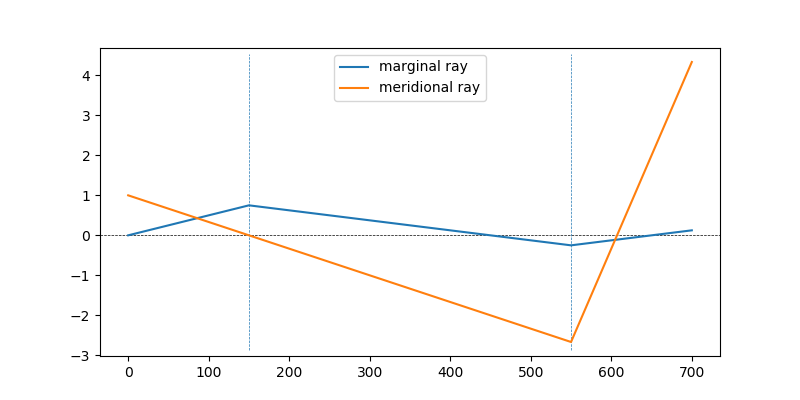

In [26]:
osys = rt.OpticalSystem(' d150 | L100 | d400 | L50 | d150 ')
height_1 = 0.0; phi_1 = 0.005;
ray_1 = (height_1, phi_1)

height_2 = 1.0; phi_2 = -1/150;
ray_2 = (height_2, phi_2)

ax = osys.plot_statics()
osys.plot_ray(ray_1, label="marginal ray")
osys.plot_ray(ray_2, label="meridional ray")
ax.legend();

### Example 3: two lens system with apertures

Let's now consider an optical sytem with lenses of finite size. Apertures of lenses can be added by '/' following a number. Apertures of lenses are plotted as thick black lines.

<IPython.core.display.Javascript object>


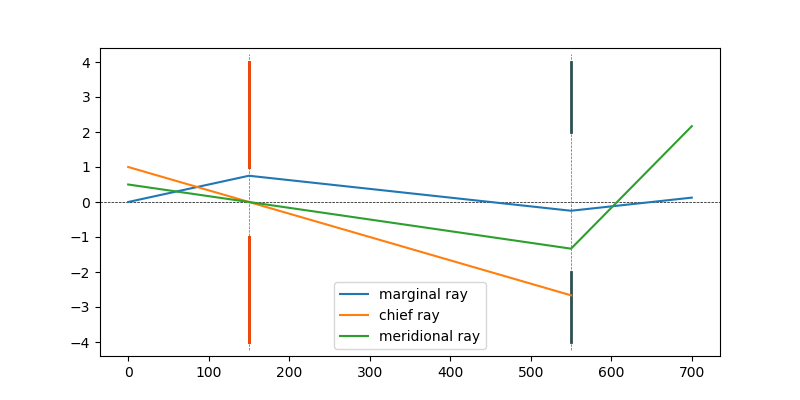

In [28]:
osys = rt.OpticalSystem(' d150 | L100/1 | d400 | L50/2 | d150 ')
height_1 = 0.0; phi_1 = 0.005;
ray_1 = (height_1, phi_1)

height_2 = 1.0; phi_2 = -1/150;
ray_2 = (height_2, phi_2)

height_2 = 1.0; phi_2 = -1/150;
ray_2 = (height_2, phi_2)

height_3 = 0.5; phi_3 = -0.5/150;
ray_3 = (height_3, phi_3)

ax = osys.plot_statics()
osys.plot_ray(ray_1, label="marginal ray")
osys.plot_ray(ray_2, label="chief ray")
osys.plot_ray(ray_3, label="meridional ray")
ax.legend();

Rays not passing an aperture 

In [ ]:
"""
ray traycing: led | d0 | l1 | d1 | l2 | d2 | d3 | l3 | d4 | l4 | d5 | d6 | obj | d7
"""

trace = 'd15 | L15/5.5 | d10 | L40/12.5 | d40 | d80 | L80/15 | d60 | L300/16 | d300 | d3.33 | L3.33/4.4 | d3.33'

sequence = rt.trace_parser(trace)

<IPython.core.display.Javascript object>


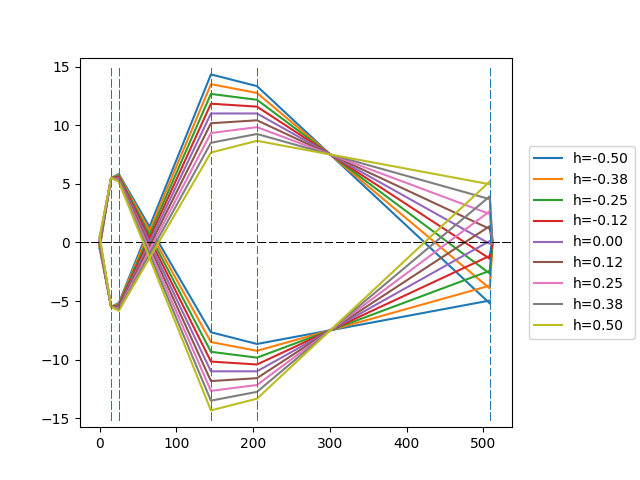

In [3]:
from numpy import arange

plt.ion()

plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)

for idx, h in enumerate(arange(-0.5, 0.6, 0.125)):
    rt.plot_ray(h, sequence, axis=ax )

fig.subplots_adjust(right=0.8)
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5));